**Mission**  

1. Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

2. When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epirecipes/epi_r.csv')

In [3]:
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [5]:
for name in null_count.index:
    print("{} is the number of null-value of {}".format(null_count.loc[name,:], name))

0    0
Name: title, dtype: int64 is the number of null-value of title
0    0
Name: rating, dtype: int64 is the number of null-value of rating
0    4117
Name: calories, dtype: int64 is the number of null-value of calories
0    4162
Name: protein, dtype: int64 is the number of null-value of protein
0    4183
Name: fat, dtype: int64 is the number of null-value of fat
0    4119
Name: sodium, dtype: int64 is the number of null-value of sodium
0    0
Name: #cakeweek, dtype: int64 is the number of null-value of #cakeweek
0    0
Name: #wasteless, dtype: int64 is the number of null-value of #wasteless
0    0
Name: 22-minute meals, dtype: int64 is the number of null-value of 22-minute meals
0    0
Name: 3-ingredient recipes, dtype: int64 is the number of null-value of 3-ingredient recipes
0    0
Name: 30 days of groceries, dtype: int64 is the number of null-value of 30 days of groceries
0    0
Name: advance prep required, dtype: int64 is the number of null-value of advance prep required
0    0
N

In [6]:
raw_data.dropna(axis=1, inplace=True)

In [7]:
raw_data.isnull().sum()

title              0
rating             0
#cakeweek          0
#wasteless         0
22-minute meals    0
                  ..
cookbooks          0
leftovers          0
snack              0
snack week         0
turkey             0
Length: 676, dtype: int64

In [8]:
raw_data_corr = raw_data.corr()

In [10]:
raw_data_corr.describe()

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,0.002347,0.001766,0.001289,0.002119,0.000601,0.002674,0.002852,0.001217,0.001204,0.005322,...,0.001653,0.001366,0.001844,0.001461,0.002295,0.001684,0.001992,0.002581,0.002521,-0.001440
std,0.048920,0.039935,0.038679,0.041002,0.039580,0.043248,0.040476,0.039185,0.038797,0.084316,...,0.040031,0.041898,0.039473,0.039230,0.042295,0.040803,0.042243,0.050282,0.049638,0.045088
min,-0.241388,-0.016179,-0.006604,-0.027241,-0.047840,-0.017476,-0.052065,-0.010375,-0.008471,-0.224767,...,-0.016452,-0.070891,-0.004973,-0.016179,-0.052883,-0.011439,-0.051770,-0.037606,-0.018246,-0.109833
25%,-0.007058,-0.001837,-0.000784,-0.002757,-0.003350,-0.001878,-0.003506,-0.001335,-0.001108,-0.018127,...,-0.003000,-0.007352,-0.000780,-0.001708,-0.006298,-0.001303,-0.001993,-0.003306,-0.002831,-0.009836
50%,0.003558,-0.000839,-0.000377,-0.001146,-0.001557,-0.000856,-0.001382,-0.000642,-0.000529,-0.005891,...,-0.001248,-0.002845,-0.000374,-0.000793,-0.002295,-0.000612,-0.000896,-0.001373,-0.001212,-0.003574
75%,0.012333,-0.000323,-0.000141,-0.000384,-0.000519,-0.000323,0.001336,-0.000244,-0.000200,-0.001472,...,-0.000432,0.002992,-0.000141,-0.000299,0.000733,-0.000229,-0.000336,-0.000457,-0.000435,-0.001077
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
raw_data_corr = raw_data_corr.replace(1, 0)
raw_data_corr

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,0.000000,0.003147,0.006771,0.011155,-0.047840,0.006717,-0.027128,-0.009179,0.000265,-0.224767,...,-0.003016,-0.023807,0.006771,0.007179,0.002294,-0.009179,-0.051770,-0.037606,-0.006739,0.022599
#cakeweek,0.003147,0.000000,-0.000122,-0.000504,-0.000635,-0.000323,-0.001279,-0.000212,-0.000173,-0.003606,...,-0.000611,-0.002845,-0.000122,-0.000299,-0.002125,-0.000212,-0.000323,-0.000647,-0.000533,-0.002639
#wasteless,0.006771,-0.000122,0.000000,-0.000206,-0.000259,-0.000132,-0.000522,-0.000086,-0.000071,-0.001472,...,-0.000250,-0.001161,-0.000050,-0.000122,-0.000867,-0.000086,-0.000132,-0.000264,-0.000217,-0.001077
22-minute meals,0.011155,-0.000504,-0.000206,0.000000,-0.001070,0.091180,-0.002154,-0.000356,-0.000291,-0.006072,...,-0.001029,0.005911,-0.000206,-0.000504,0.010584,-0.000356,0.091180,-0.001089,-0.000897,0.007050
3-ingredient recipes,-0.047840,-0.000635,-0.000259,-0.001070,0.000000,-0.000686,-0.002715,-0.000449,-0.000367,-0.007654,...,-0.001297,0.002455,-0.000259,-0.000635,-0.004510,-0.000449,-0.000686,0.035047,-0.001131,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cookbooks,-0.009179,-0.000212,-0.000086,-0.000356,-0.000449,-0.000229,-0.000904,-0.000150,-0.000122,-0.002550,...,-0.000432,-0.002012,-0.000086,-0.000212,-0.001502,0.000000,-0.000229,-0.000457,-0.000377,-0.001866
leftovers,-0.051770,-0.000323,-0.000132,0.091180,-0.000686,-0.000349,-0.001382,-0.000229,-0.000187,-0.003895,...,-0.000660,0.013600,-0.000132,-0.000323,-0.002295,-0.000229,0.000000,-0.000699,-0.000576,0.068780
snack,-0.037606,-0.000647,-0.000264,-0.001089,0.035047,-0.000699,-0.002765,-0.000457,-0.000373,-0.007795,...,-0.001321,0.002191,-0.000264,-0.000647,-0.004593,-0.000457,-0.000699,0.000000,0.780163,-0.005704
snack week,-0.006739,-0.000533,-0.000217,-0.000897,-0.001131,-0.000576,-0.002277,-0.000377,-0.000308,-0.006420,...,-0.001088,0.005058,-0.000217,-0.000533,-0.003783,-0.000377,-0.000576,0.780163,0.000000,-0.004698


In [12]:
raw_data_corr.describe()

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,0.000865,0.000284,-0.000193,0.000637,-0.000881,0.001192,0.001370,-0.000264,-0.000278,0.003840,...,0.000172,-0.000115,0.000362,-0.000021,0.000813,0.000203,0.000511,0.001100,0.001039,-0.002921
std,0.030237,0.010686,0.003741,0.014198,0.009082,0.019810,0.012684,0.007291,0.004783,0.075094,...,0.011024,0.016541,0.008817,0.007582,0.017600,0.013565,0.017451,0.032405,0.031393,0.023297
min,-0.241388,-0.016179,-0.006604,-0.027241,-0.047840,-0.017476,-0.052065,-0.010375,-0.008471,-0.224767,...,-0.016452,-0.070891,-0.004973,-0.016179,-0.052883,-0.011439,-0.051770,-0.037606,-0.018246,-0.109833
25%,-0.007058,-0.001837,-0.000784,-0.002757,-0.003350,-0.001878,-0.003506,-0.001335,-0.001108,-0.018127,...,-0.003000,-0.007352,-0.000780,-0.001708,-0.006298,-0.001303,-0.001993,-0.003306,-0.002831,-0.009836
50%,0.003538,-0.000839,-0.000377,-0.001146,-0.001557,-0.000856,-0.001382,-0.000642,-0.000529,-0.005891,...,-0.001248,-0.002845,-0.000374,-0.000793,-0.002295,-0.000612,-0.000896,-0.001373,-0.001212,-0.003574
75%,0.012204,-0.000323,-0.000141,-0.000384,-0.000519,-0.000323,0.001259,-0.000244,-0.000200,-0.001472,...,-0.000432,0.002856,-0.000141,-0.000299,0.000584,-0.000229,-0.000336,-0.000457,-0.000435,-0.001077
max,0.124549,0.153463,0.072592,0.242439,0.110745,0.377719,0.080005,0.139742,0.060245,0.851944,...,0.170861,0.116693,0.142686,0.108706,0.170861,0.333234,0.377804,0.780163,0.780163,0.285808


In [13]:
raw_data_corr.describe().loc['max',:]

rating                  0.124549
#cakeweek               0.153463
#wasteless              0.072592
22-minute meals         0.242439
3-ingredient recipes    0.110745
                          ...   
cookbooks               0.333234
leftovers               0.377804
snack                   0.780163
snack week              0.780163
turkey                  0.285808
Name: max, Length: 675, dtype: float64

In [14]:
df_max = pd.DataFrame(raw_data_corr.describe().loc['max',:])

In [15]:
df_max

,max
rating,0.124549
#cakeweek,0.153463
#wasteless,0.072592
22-minute meals,0.242439
3-ingredient recipes,0.110745
...,...
cookbooks,0.333234
leftovers,0.377804
snack,0.780163
snack week,0.780163


In [16]:
df_max.sort_values(by='max', ascending=False, inplace=True)

In [17]:
df_max

,max
soy free,0.940721
peanut free,0.940721
pescatarian,0.871690
kosher,0.871690
alcoholic,0.851944
...,...
nebraska,0.043081
vermont,0.041993
oklahoma,0.038173
maryland,0.036320


In [18]:
df_max_top30 = df_max.iloc[np.arange(0,30,1)]

In [19]:
index_30 = df_max_top30.index

In [20]:
index_30

Index(['soy free', 'peanut free', 'pescatarian', 'kosher', 'alcoholic',
       'drink', 'tree nut free', 'oregon', 'portland', 'kentucky',
       'louisville', 'snack', 'snack week', 'vegetarian', 'breakfast',
       'brunch', 'caviar', 'potato salad', 'new orleans', 'kitchen olympics',
       'louisiana', 'chicago', 'illinois', 'missouri', 'st. louis',
       'washington', 'seattle', 'grill/barbecue', 'grill',
       'wheat/gluten-free'],
      dtype='object')

In [21]:
raw_data_30 = raw_data[index_30]

In [22]:
raw_data_30_corr = raw_data_30.corr()
raw_data_30_corr

,soy free,peanut free,pescatarian,kosher,alcoholic,drink,tree nut free,oregon,portland,kentucky,...,louisiana,chicago,illinois,missouri,st. louis,washington,seattle,grill/barbecue,grill,wheat/gluten-free
soy free,1.000000,0.940721,0.734679,0.726753,-0.145945,-0.157784,0.797465,-0.008801,-0.003905,-0.010058,...,-0.004416,0.002783,-0.001155,-0.017884,-0.015365,-0.007026,0.004401,-0.029103,0.021834,0.615347
peanut free,0.940721,1.000000,0.737887,0.734778,-0.151502,-0.162881,0.829673,-0.009693,-0.004719,-0.010375,...,-0.004822,0.002336,-0.001758,-0.018592,-0.015850,-0.008087,0.003694,-0.025231,0.026914,0.590099
pescatarian,0.734679,0.737887,1.000000,0.871690,-0.113495,-0.117379,0.596198,-0.013159,-0.006042,-0.008033,...,-0.001580,-0.001580,-0.002234,-0.013243,-0.012272,-0.002520,0.004804,-0.069407,-0.031517,0.473998
kosher,0.726753,0.734778,0.871690,1.000000,-0.113094,-0.117241,0.595114,-0.017032,-0.010349,-0.008160,...,-0.009422,0.005876,0.002902,-0.013542,-0.012466,-0.006024,0.004454,-0.058243,-0.020701,0.462679
alcoholic,-0.145945,-0.151502,-0.113495,-0.113094,1.000000,0.851944,-0.128814,0.001694,0.003427,-0.002550,...,-0.002944,-0.002944,-0.004164,-0.005510,-0.003895,-0.007511,-0.004656,-0.049221,-0.033952,-0.094827
drink,-0.157784,-0.162881,-0.117379,-0.117241,0.851944,1.000000,-0.139726,-0.000215,0.001505,0.015079,...,-0.003382,-0.003382,-0.004783,-0.006328,-0.004474,-0.008626,-0.005348,-0.056823,-0.039396,-0.095268
tree nut free,0.797465,0.829673,0.596198,0.595114,-0.128814,-0.139726,1.000000,-0.005685,-0.001029,-0.009002,...,-0.002997,0.004400,0.000992,-0.015496,-0.013752,-0.009097,0.006959,0.000540,0.040991,0.552269
oregon,-0.008801,-0.009693,-0.013159,-0.017032,0.001694,-0.000215,-0.005685,1.000000,0.829149,-0.000377,...,-0.000435,-0.000435,-0.000615,-0.000814,-0.000576,-0.001110,-0.000688,-0.000327,0.004564,-0.009987
portland,-0.003905,-0.004719,-0.006042,-0.010349,0.003427,0.001505,-0.001029,0.829149,1.000000,-0.000335,...,-0.000386,-0.000386,-0.000547,-0.000723,-0.000511,-0.000986,-0.000611,0.001393,0.006378,-0.007086
kentucky,-0.010058,-0.010375,-0.008033,-0.008160,-0.002550,0.015079,-0.009002,-0.000377,-0.000335,1.000000,...,-0.000173,-0.000173,-0.000244,-0.000323,-0.000229,-0.000441,-0.000273,-0.002953,-0.002081,-0.006962


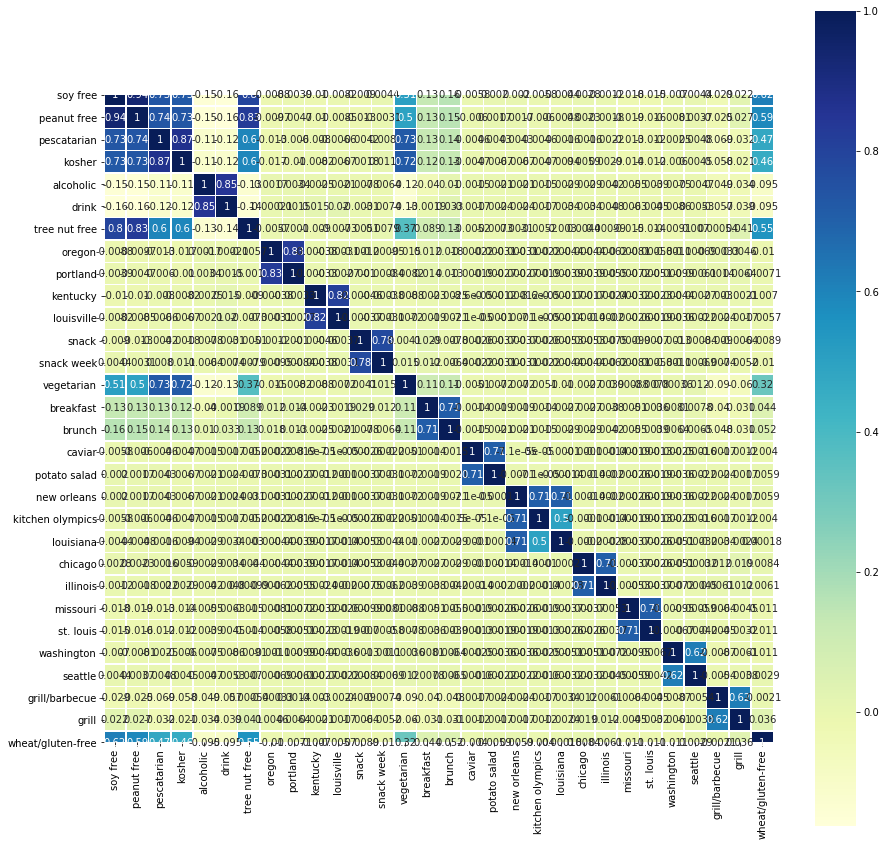

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(raw_data_30_corr, linewidths=0.5, annot=True, square=True, cmap='YlGnBu')
plt.show()

In [24]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data_30.sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/Users/FeEl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

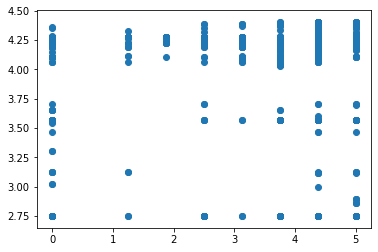

In [25]:
plt.scatter(Y, svr.predict(X))

In [26]:
svr.score(X, Y)

-0.06535170118625944

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/FeEl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/FeEl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/FeEl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/FeEl/anaconda3/lib/python3.7/site-packages/sklearn/

array([-0.06440096, -0.10587116, -0.06593027, -0.08609123, -0.06521572])

**Analytic Lens**  

This model is better than Thinkful's example one. However, it has still quite bad performance.  

Then, let's look into our model's performances.
The cross_val_score shows not even scores. It means that the model is not well fitted to data or we can say that the models is underfitting or overfitting.  

Okay, It sounds bad.  
And one more intersting thing we could see right away that is minus values.  
This usually happens if the function doesn't contains proper constant value. And it means that the model does not fully explain the target value, which is Y (rating)

So, overally, this model is not good for this data type. And this data should be polished.